In [4]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# import plotly.express as px
# import plotly.graph_objects as go

from utils.plotting import plot_interactive_lines

In [5]:
FILE_PATH = "./data/task1/imu_reading_task1.csv"
FIGURES_FOLDER = "./figures/task_1/"
if not os.path.exists(FIGURES_FOLDER):
    os.makedirs(FIGURES_FOLDER)

In [38]:
# The robot is equipped with an inertial measurement unit (IMU),
# which is a combination of accelerometer, gyroscope, and magnetometer.

# Columns description:
# 1         :  timestamp in ms
# 2,3,4     :  linear acceleration in x,y,z axis given in gravity unit
# 5,6       :  roll and pitch angle from accelerometer in degree
# 7,8,9     :  gyroscope x,y,z in degree/s
# 10,11,12  :  magnetometer field strength in x,y,z axis in Gauss unit

col_names = ["timestamp","la_x","la_y","la_z","roll","pitch","gyr_x","gyr_y","gyr_z","mag_x","mag_y","mag_z"]
labels = ["X linear acceleration (gravity unit)",
          "Y linear acceleration (gravity unit)",
          "Z linear acceleration (gravity unit)",
          "Roll angle (degree)",
          "Pitch angle (degree)",
          "X gyroscope (degree/s)",
          "Y gyroscope (degree/s)",
          "Z gyroscope (degree/s)",
          "X magnetometer (gauss unit)",
          "Y magnetometer (gauss unit)",
          "Z magnetometer (gauss unit)"]
df = pd.read_csv(FILE_PATH, header=None, names=col_names)

In [7]:
# Plotly plot with interactive interface

# plot_interactive_lines(df, col_names[0], col_names[1:], "Task 1 Sensor Data")

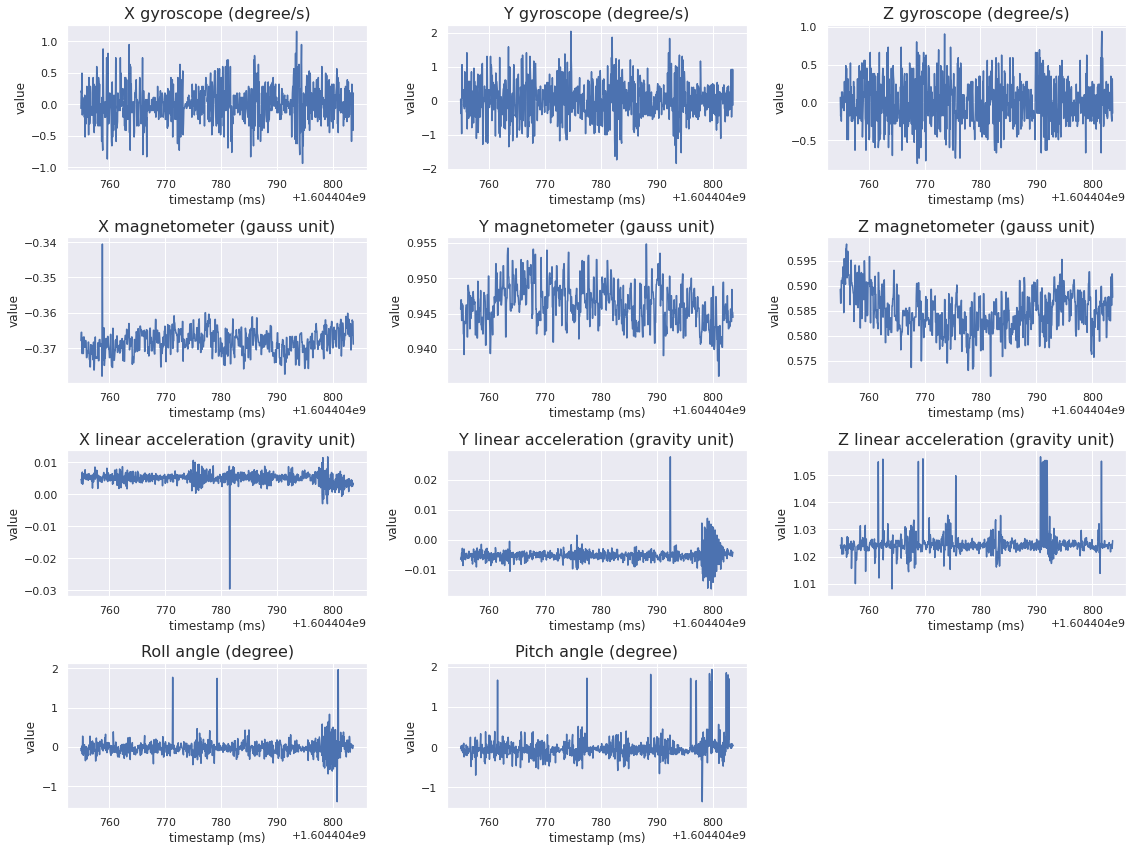

In [45]:
# Save plot for each measurment series

fig, axs = plt.subplots(4, 3, figsize=(16, 12))
for ax_x in range(4):
    for ax_y in range(3):
        axs[ax_x, ax_y].set_xlabel("timestamp (ms)")
        axs[ax_x, ax_y].set_ylabel("value")

_cols = ["gyr_x","gyr_y","gyr_z"]
_labels = ["X gyroscope (degree/s)",
           "Y gyroscope (degree/s)",
           "Z gyroscope (degree/s)"]
for i in range(3):
    axs[0, i].plot(df[col_names[0]], df[_cols[i]])
    axs[0, i].set_title(_labels[i], size=16)

_cols = ["mag_x","mag_y","mag_z"]
_labels = ["X magnetometer (gauss unit)",
           "Y magnetometer (gauss unit)",
           "Z magnetometer (gauss unit)"]
for i in range(3):
    axs[1, i].plot(df[col_names[0]], df[_cols[i]])
    axs[1, i].set_title(_labels[i], size=16)

_cols = ["la_x","la_y","la_z"]
_labels = ["X linear acceleration (gravity unit)",
           "Y linear acceleration (gravity unit)",
           "Z linear acceleration (gravity unit)"]
for i in range(3):
    axs[2, i].plot(df[col_names[0]], df[_cols[i]])
    axs[2, i].set_title(_labels[i], size=16)

_cols = ["roll","pitch"]
_labels = ["Roll angle (degree)",
           "Pitch angle (degree)"]
for i in range(2):
    axs[3, i].plot(df[col_names[0]], df[_cols[i]])
    axs[3, i].set_title(_labels[i], size=16)
    
axs[3,2].set_axis_off()
plt.tight_layout()
fig.savefig(FIGURES_FOLDER + "task_1_plotting.pdf")

# fig, axs = plt.subplots(6, 2, figsize=(14, 2*(len(col_names)-1)))
# for i in range(1,len(col_names)):
#     ax_x = i-1 if i<7 else i-7
#     ax_y = i//7
#     axs[ax_x, ax_y].plot(df[col_names[0]], df[col_names[i]])
#     axs[ax_x, ax_y].set_title(labels[i-1], size=16)
#     axs[ax_x, ax_y].set_xlabel("timestamp (ms)")
#     axs[ax_x, ax_y].set_ylabel("value")
# axs[5,1].set_axis_off()
# plt.tight_layout()
# fig.savefig(FIGURES_FOLDER + "task_1_plotting.pdf")

In [10]:
df_description = df.iloc[:,1:].describe()
df_description.loc[["mean"]]

,la_x,la_y,la_z,roll,pitch,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
mean,0.005002,-0.005104,1.024716,-0.024879,-0.032199,0.008971,0.016855,-0.001298,-0.368266,0.946362,0.584804


In [13]:
columns_to_include = ["gyr_x", "gyr_y", "gyr_z"]

cov_matrix = np.cov(df.loc[:,columns_to_include].values.T)

cm = sns.light_palette("green", as_cmap=True)
pd.DataFrame(
    cov_matrix.round(5), columns=columns_to_include, index=columns_to_include
).style.background_gradient(cmap=cm)

,gyr_x,gyr_y,gyr_z
gyr_x,0.085090,-0.131910,-0.052100
gyr_y,-0.131910,0.327210,0.124130
gyr_z,-0.052100,0.124130,0.094090
